In [32]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from cycler import cycler
import requests
from pywaffle import Waffle
import numpy as np
import squarify

%matplotlib inline

In [146]:
plt.rcParams.update({
    'pdf.fonttype': 42,
    'axes.prop_cycle': cycler('color', ['#52bbb7', '#8fdeb4', '#f16764', '#ca4862', '#461d2d', '#9C2964', '#1B7EBE', '#E4C34A']),
    'ps.fonttype': 42,
    'grid.linestyle': '--',
    'axes.facecolor': '#8fdeb4',
    'figure.facecolor': '#8fdeb4',
    'axes.spines.left' : True,
    'axes.spines.right' : False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : True,
    'font.family': 'sans',
    'font.sans-serif': 'RobotoCondensed-Bold',
    'font.serif': 'Lora-Regular',
    'axes.titlesize': 'x-large',
    'axes.titleweight': 'bold',
    'axes.grid': True,
    'grid.color': 'silver',
    'axes.axisbelow': True,
    'xtick.bottom' : False,
    'ytick.left' : False,
    'axes.titlepad' : 15.0,
    'legend.frameon' : False,
    'ytick.labelsize': 15,
    'xtick.labelsize': 15,
    'axes.titlesize': 30,
    'text.color': '#1B7EBE',
    'axes.labelcolor': '#1B7EBE',
    'xtick.color': '#1B7EBE',
    'ytick.color': '#1B7EBE'
    
})

In [65]:
df = pd.read_csv('all-ufo-sightings-thru-08-06-2018.csv')

In [66]:
df

,city,city_latitude,city_longitude,date_time,duration,posted,report_link,shape,state,stats,summary,text,seen_at
0,Fort Collins,40.550698,-105.077295,7/18/18 21:50,45 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142315.html,Light,CO,Occurred : 7/18/2018 21:50 (Entered as : 07/1...,"Amber light drops from sky, stops abruptly, sh...","Amber light drops from sky, stops abruptly, sh...",2018-07-18 21:50:00
1,Vance,33.218400,-87.228700,7/18/18 21:30,2-3 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142313.html,Light,AL,Occurred : 7/18/2018 21:30 (Entered as : 07/1...,Bright white light moving at speed headed sout...,Bright white light moving at speed headed sout...,2018-07-18 21:30:00
2,Davenport,47.675000,-118.197800,7/18/18 21:15,10 seconds,7/19/18,http://www.nuforc.org/webreports/142/S142316.html,Light,WA,Occurred : 7/18/2018 21:15 (Entered as : 07/1...,Light moving at an exceptionally high rate of ...,Light moving at an exceptionally high rate of ...,2018-07-18 21:15:00
3,North Las Vegas,36.243659,-115.144963,7/18/18 21:00,5 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142318.html,Oval,NV,Occurred : 7/18/2018 21:00 (Entered as : 07/1...,Orb like UFO followed by High Speed Aircraft o...,Orb like UFO followed by High Speed Aircraft o...,2018-07-18 21:00:00
4,Peculiar,38.703100,-94.473700,7/18/18 20:45,1 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142314.html,Cylinder,MO,Occurred : 7/18/2018 20:45 (Entered as : 07/1...,Object was moving from northeast to south west...,Object was moving from northeast to south west...,2018-07-18 20:45:00
5,Albuquerque,35.103481,-106.612475,7/18/18 20:45,2 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142312.html,Other,NM,Occurred : 7/18/2018 20:45 (Entered as : 07/1...,I was on the roof when my son looked up and sa...,I was on the roof when my son looked up and sa...,2018-07-18 20:45:00
6,Grantwood village,NaN,NaN,7/18/18 18:43,4 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142310.html,Cigar,MO,Occurred : 7/18/2018 18:43 (Entered as : 07/1...,I thought it was a plane due to alot passing b...,I thought it was a plane due to alot passing b...,2018-07-18 18:43:00
7,Peruíbe (Brazil),NaN,NaN,7/18/18 18:30,2 seconds,7/19/18,http://www.nuforc.org/webreports/142/S142255.html,Light,NaN,Occurred : 7/18/2018 18:30 (Entered as : 07/1...,Avistamento em Peruíbe,Avistamento em PeruíbeEstava olhando para o pl...,2018-07-18 18:30:00
8,Tice,NaN,NaN,7/18/18 11:00,2 hours,7/19/18,http://www.nuforc.org/webreports/142/S142311.html,Other,FL,Occurred : 7/18/2018 11:00 (Entered as : 7/18...,Silent UFO mimic jets still floating over. ((...,Silent UFO mimic jets still floating over.A re...,2018-07-18 11:00:00
9,Lake in the Hills,42.187000,-88.346500,7/18/18 03:30,30 minutes to 1 hour,7/19/18,http://www.nuforc.org/webreports/142/S142303.html,Light,IL,Occurred : 7/18/2018 03:30 (Entered as : 07/1...,"Started as one light and then split into 3, on...","Started as one light and then split into 3, on...",2018-07-18 03:30:00


In [67]:
df.text.fillna('url is broken', inplace=True)
df.stats.fillna('url is broken', inplace=True)

In [68]:
df[df.text.str.contains(r'\bprobed\b')].text[115485]

'Woke up inside of a tanning bed-like enclosement, appeared to be traveling with high turbulence, alien zapped me back unconscious Possible abduction?  Hard to say.. But here is an account of the incident.  I fell asleep on my couch in Columbus, OH at around 1:30 a.m. Eastern Standard Time on 7-8-17.  Then I woke up on my back, inside of what I equated to being an enclosed tanning bed-like apparatus.  It felt as if I was traveling at a high rate of speed and the ride was very turbulent.  I began to look around and one of the things I remember seeing is a worn down "yellow labeling" on the inside of whatever the hell I was enclosed in.  The next thing I know, at least my head was no longer enclosed as I saw an alien take an object and touched my forehead with it and I was "out cold".  I woke back up on couch in the exact same position I fell asleep on with my CPAP on just as it was prior to this "possible abduction".  I had no fear, not sure why..  In the ensuing minutes after waking up

In [69]:
df.seen_at = pd.to_datetime(df.seen_at)

In [ ]:
df.seen_at = df.s

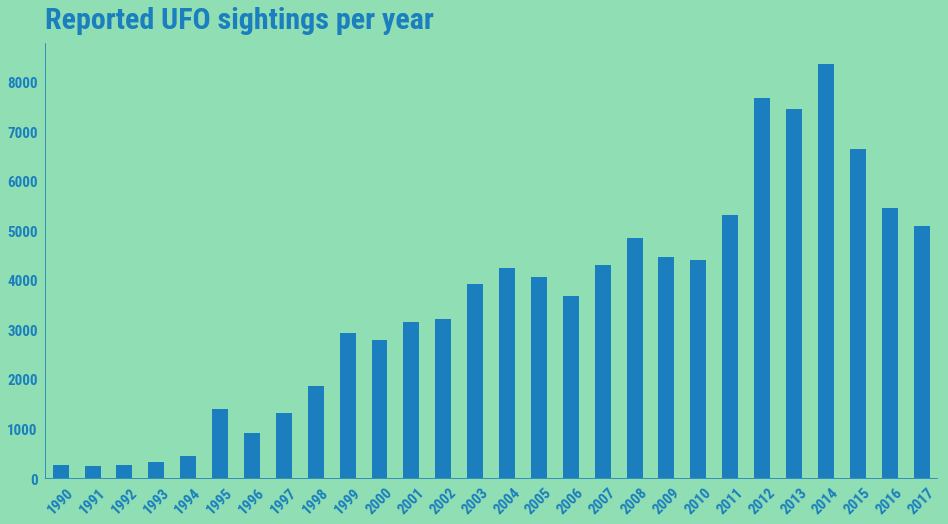

In [151]:
fig, ax = plt.subplots(facecolor='#8fdeb4')

ax = df[(df.seen_at.dt.year > 1989) & (df.seen_at.dt.year < 2018)].resample('A', on='seen_at').state.count().plot(kind='bar',figsize=(16,8), color='#1B7EBE')

bar_labels = range(1990,2018)

ax.grid(False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Reported UFO sightings per year', fontdict={'color':'#1B7EBE'}, loc='left')
ax.set_xticklabels(labels=bar_labels)

ax.spines['bottom'].set_color('#1B7EBE')
ax.spines['left'].set_color('#1B7EBE')

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.savefig('reported-ufo-sightings.png', facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')

In [91]:
ax.title?

In [113]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'k',
          'axes.facecolor': '#8fdeb4',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.forma